<a href="https://colab.research.google.com/github/MdAashif-h/Edunet_Internship-AIML-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌱 AI-BASED CROP DISEASE DETECTION - DAY 1 (FINAL)

🔧 STEP 1: Checking GPU availability...
TensorFlow: 2.19.0
GPUs found: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
✅ GPU detected - enabling memory growth

📦 STEP 2: Installing required libraries (kaggle, pillow, seaborn)...
✅ Install step done

📚 STEP 3: Importing libraries...
✅ Imports ready

🔑 STEP 4: Kaggle API setup
✅ kaggle.json placed at ~/.kaggle/kaggle.json
kaggle CLI version:
Kaggle API 1.7.4.5

📥 STEP 5: Downloading dataset: abdallahalidev/plantvillage-dataset (may take a few minutes)...
Dataset zip already present, skipping download.

📂 STEP 6: Extracting dataset...
Removing previous extraction folder for a clean run...
✅ Extracted to plantvillage_raw

🔎 STEP 7: Locating folder containing class subfolders (segmented/color/grayscale)...
✅ Using image root: plantvillage_raw/plantvillage dataset/color

🧹 STEP 8: Preparing train/val folders (clean if exist)...
 - Removing existing folder plantvillage/train

Processing classes: 100%|██████████| 38/38 [01:35<00:00,  2.52s/it]



✅ Copy complete. Training images: 43,429, Validation images: 10,876

📊 STEP 10: Building dataset distribution and plotting EDA...

Top 15 classes by training images:


Train   Val  Total
Orange___Haunglongbing_(Citrus_greening)        4405  1102   5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus          4285  1072   5357
Soybean___healthy                               4072  1018   5090
Peach___Bacterial_spot                          1837   460   2297
Tomato___Bacterial_spot                         1701   426   2127
Tomato___Late_blight                            1527   382   1909
Squash___Powdery_mildew                         1468   367   1835
Tomato___Septoria_leaf_spot                     1416   355   1771
Tomato___Spider_mites Two-spotted_spider_mite   1340   336   1676
Apple___healthy                                 1316   329   1645
Tomato___healthy                                1272   319   1591
Blueberry___healthy                             1201   301   1502
Pepper,_bell___healthy                          1182   296   1478
Tomato___Target_Spot                            1123   281   1404
Grape___Esca_(Black_Measles)                    1106   277   1383


Dataset totals: Classes=38, Images=54,305 (Train=43,429, Val=10,876)


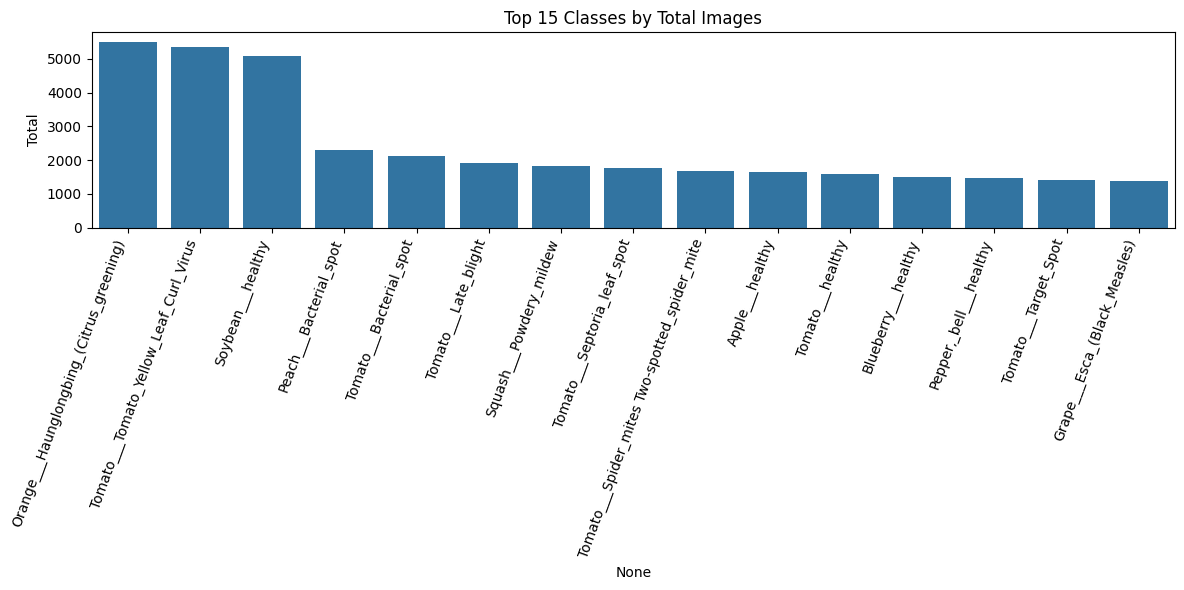


🖼 Sample images (top classes):


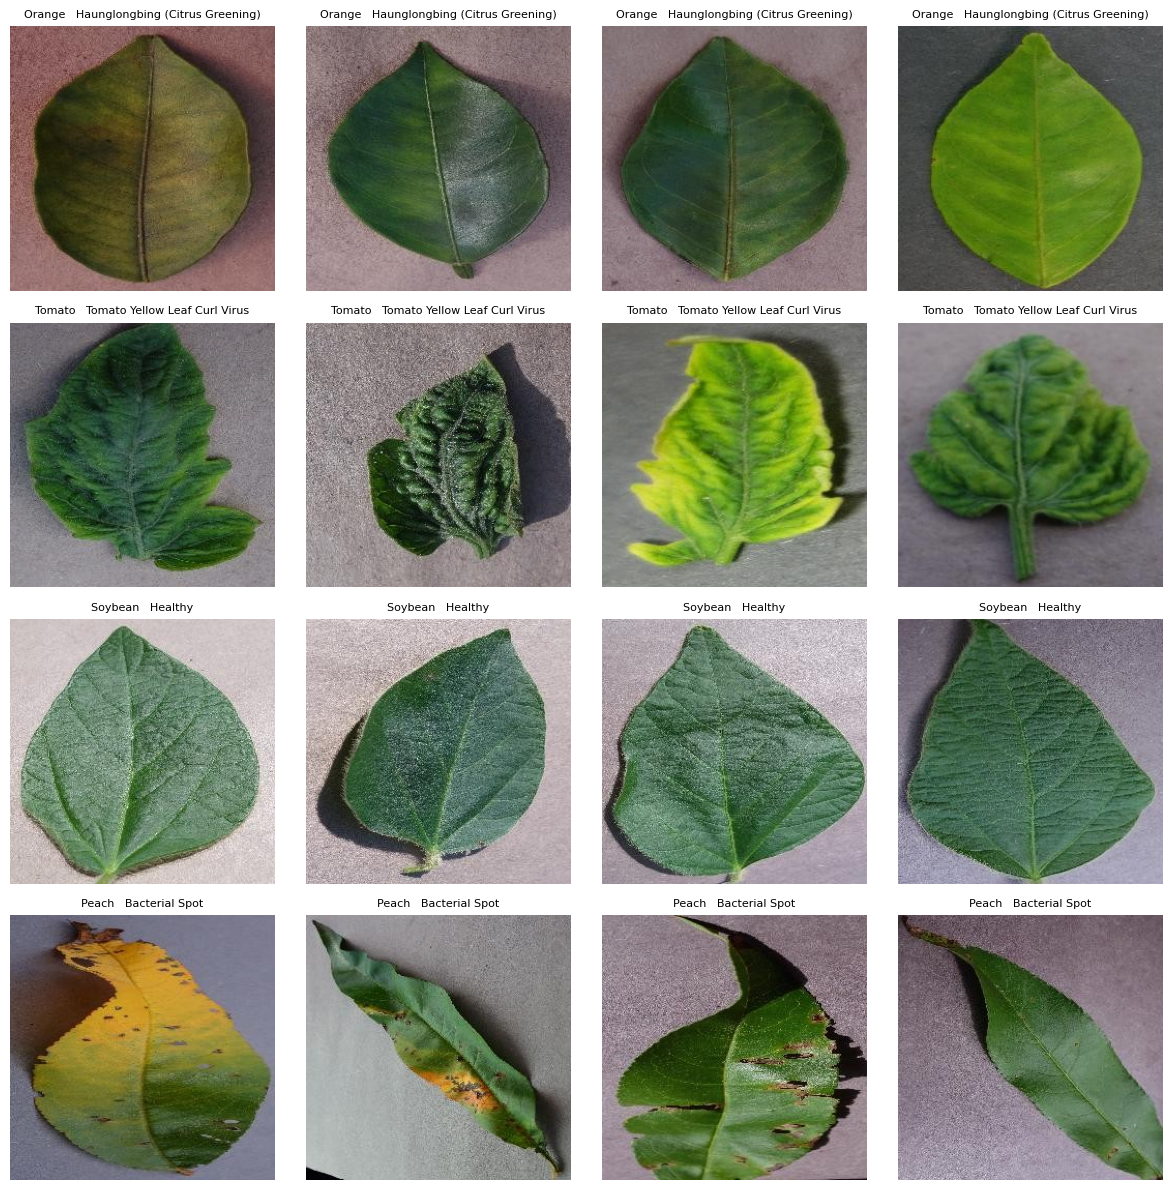


🎉 DAY 1 (FINAL) Complete — your dataset is ready for Day 2.
Train folder: plantvillage/train (43,429 images) 
Val   folder: plantvillage/val (10,876 images) 
Classes: 38
Next: run Day 2 notebook/cell which expects train/val at the above paths.


In [23]:
# ===============================================================
# 🌱 AI-BASED CROP DISEASE DETECTION PROJECT
# Day 1: Final (Production-quality) Setup, Download, Auto-Split & EDA
# ===============================================================

print("="*70)
print("🌱 AI-BASED CROP DISEASE DETECTION - DAY 1 (FINAL)")
print("="*70)

# -------------------------
# STEP 0: Config (edit if you want)
# -------------------------
DOWNLOAD_DATASET = True                       # set False if dataset already downloaded
DATASET_REF = "abdallahalidev/plantvillage-dataset"
ZIP_NAME = "plantvillage-dataset.zip"
EXTRACT_PATH = Path("./plantvillage_raw")
TRAIN_DIR = Path("./plantvillage/train")
VAL_DIR   = Path("./plantvillage/val")
MIN_IMAGES_PER_CLASS = 5                     # skip classes with fewer images
RESIZE_ON_COPY = True                        # set False to keep original size
RESIZE_WH = (256, 256)                       # resize target (HxW)
VALID_EXT = {'.jpg', '.jpeg', '.png', '.bmp'}

# -------------------------
# STEP 1: GPU check
# -------------------------
print("\n🔧 STEP 1: Checking GPU availability...")
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print("TensorFlow:", tf.__version__)
print("GPUs found:", gpus)
if gpus:
    print("✅ GPU detected - enabling memory growth")
    for g in gpus:
        try:
            tf.config.experimental.set_memory_growth(g, True)
        except Exception:
            pass
else:
    print("⚠️ No GPU detected. For faster training enable GPU in Colab: Runtime -> Change runtime type -> GPU")

# -------------------------
# STEP 2: Install libs
# -------------------------
print("\n📦 STEP 2: Installing required libraries (kaggle, pillow, seaborn)...")
# pinned kaggle to a known working version isn't strictly necessary; this will install latest
!pip install -q kaggle plotly seaborn pillow

print("✅ Install step done")

# -------------------------
# STEP 3: imports
# -------------------------
print("\n📚 STEP 3: Importing libraries...")
import os, zipfile, shutil, sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
print("✅ Imports ready")

# -------------------------
# STEP 4: Kaggle API setup (upload kaggle.json when prompted)
# -------------------------
print("\n🔑 STEP 4: Kaggle API setup")
from google.colab import files
uploaded = {}
# if kaggle.json not in working dir, prompt upload (Colab)
if not Path("kaggle.json").exists():
    print("Please upload your kaggle.json (Kaggle > Account > Create New API Token).")
    uploaded = files.upload()  # will open a file picker in Colab

# handle potential weird filenames like "kaggle (1).json"
if not Path("kaggle.json").exists():
    for fname in uploaded.keys():
        if fname.lower().startswith("kaggle") and fname.lower().endswith(".json"):
            Path(fname).rename("kaggle.json")
            break

if not Path("kaggle.json").exists():
    raise FileNotFoundError("kaggle.json not found. Upload kaggle.json and re-run this cell.")

# move to ~/.kaggle with correct perms
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.copy2("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
print("✅ kaggle.json placed at ~/.kaggle/kaggle.json")

# quick verify
print("kaggle CLI version:")
!kaggle --version

# -------------------------
# STEP 5: Download dataset (if needed)
# -------------------------
if DOWNLOAD_DATASET:
    print(f"\n📥 STEP 5: Downloading dataset: {DATASET_REF} (may take a few minutes)...")
    if Path(ZIP_NAME).exists():
        print("Dataset zip already present, skipping download.")
    else:
        !kaggle datasets download -d {DATASET_REF} -p . --force
        print("✅ Download completed")

# -------------------------
# STEP 6: Extract dataset
# -------------------------
print("\n📂 STEP 6: Extracting dataset...")
if EXTRACT_PATH.exists():
    print("Removing previous extraction folder for a clean run...")
    shutil.rmtree(EXTRACT_PATH)

EXTRACT_PATH.mkdir(parents=True, exist_ok=True)
with zipfile.ZipFile(ZIP_NAME, 'r') as zf:
    zf.extractall(EXTRACT_PATH)
print(f"✅ Extracted to {EXTRACT_PATH}")

# -------------------------
# STEP 7: Auto-detect image root (segmented/color/grayscale)
# -------------------------
print("\n🔎 STEP 7: Locating folder containing class subfolders (segmented/color/grayscale)...")
# look for common candidate directories
candidates = list(EXTRACT_PATH.rglob("*"))
image_root = None
for cand in candidates:
    if cand.is_dir():
        # check if it contains many subdirs with images
        subdirs = [d for d in cand.iterdir() if d.is_dir()]
        if len(subdirs) >= 3:  # heuristic: dataset has many class folders
            # validate that subdirs contain image files
            sample_counts = 0
            for d in subdirs[:5]:
                if any((p.suffix.lower() in VALID_EXT) for p in d.glob("*.*")):
                    sample_counts += 1
            if sample_counts >= 1:
                image_root = cand
                break

if image_root is None:
    # fallback: try known path
    possible = EXTRACT_PATH / "plantvillage dataset" / "segmented"
    if possible.exists():
        image_root = possible

if image_root is None:
    raise FileNotFoundError("Could not auto-detect image root. Inspect extracted folders under: " + str(EXTRACT_PATH))

print(f"✅ Using image root: {image_root}")

# -------------------------
# STEP 8: Prepare train/val folders (re-run safe)
# -------------------------
print("\n🧹 STEP 8: Preparing train/val folders (clean if exist)...")
for p in [TRAIN_DIR, VAL_DIR]:
    if p.exists():
        print(f" - Removing existing folder {p} for clean run")
        shutil.rmtree(p)
    p.mkdir(parents=True, exist_ok=True)
print("✅ Clean train/val folders ready")

# -------------------------
# STEP 9: Split and copy images (with filtering, skipping tiny classes)
# -------------------------
print("\n✂️ STEP 9: Splitting into train/val and copying images (this may take a few minutes)...")
classes = sorted([d.name for d in image_root.iterdir() if d.is_dir()])
print(f"Found {len(classes)} candidate classes (showing first 10): {classes[:10]}")

copied_train = 0
copied_val = 0
skipped_classes = []

from tqdm import tqdm

for cls in tqdm(classes, desc="Processing classes"):
    cls_path = image_root / cls
    images = [p for p in cls_path.glob("*.*") if p.suffix.lower() in VALID_EXT]
    if len(images) < MIN_IMAGES_PER_CLASS:
        skipped_classes.append((cls, len(images)))
        continue

    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)
    (TRAIN_DIR/cls).mkdir(parents=True, exist_ok=True)
    (VAL_DIR/cls).mkdir(parents=True, exist_ok=True)

    # copy (and optionally resize)
    for src in train_imgs:
        dst = TRAIN_DIR/cls/src.name
        try:
            if RESIZE_ON_COPY:
                img = Image.open(src).convert("RGB")
                img.thumbnail(RESIZE_WH, Image.Resampling.LANCZOS)
                img.save(dst, quality=90)
            else:
                shutil.copy2(src, dst)
            copied_train += 1
        except Exception:
            # fallback simple copy for any unexpected issue
            try:
                shutil.copy2(src, dst)
                copied_train += 1
            except Exception:
                pass

    for src in val_imgs:
        dst = VAL_DIR/cls/src.name
        try:
            if RESIZE_ON_COPY:
                img = Image.open(src).convert("RGB")
                img.thumbnail(RESIZE_WH, Image.Resampling.LANCZOS)
                img.save(dst, quality=90)
            else:
                shutil.copy2(src, dst)
            copied_val += 1
        except Exception:
            try:
                shutil.copy2(src, dst)
                copied_val += 1
            except Exception:
                pass

print(f"\n✅ Copy complete. Training images: {copied_train:,}, Validation images: {copied_val:,}")
if skipped_classes:
    print(f"⚠️ Skipped {len(skipped_classes)} classes with < {MIN_IMAGES_PER_CLASS} images (examples): {skipped_classes[:5]}")

# -------------------------
# STEP 10: Build distribution dataframe and EDA visuals
# -------------------------
print("\n📊 STEP 10: Building dataset distribution and plotting EDA...")
train_counts = {}
val_counts = {}
final_classes = []
for d in TRAIN_DIR.iterdir():
    if d.is_dir():
        tcount = len(list(d.glob("*.*")))
        vcount = len(list((VAL_DIR/d.name).glob("*.*"))) if (VAL_DIR/d.name).exists() else 0
        if tcount + vcount > 0:
            train_counts[d.name] = tcount
            val_counts[d.name] = vcount
            final_classes.append(d.name)

dist_df = pd.DataFrame({'Train': train_counts, 'Val': val_counts}).fillna(0)
dist_df['Total'] = dist_df['Train'] + dist_df['Val']
dist_df = dist_df.sort_values('Train', ascending=False)

print("\nTop 15 classes by training images:")
display(dist_df.head(15))

print(f"\nDataset totals: Classes={len(dist_df)}, Images={int(dist_df['Total'].sum()):,} (Train={int(dist_df['Train'].sum()):,}, Val={int(dist_df['Val'].sum()):,})")

# bar plot top 15
plt.figure(figsize=(12,6))
sns.barplot(x=dist_df.head(15).index, y=dist_df.head(15)['Total'])
plt.xticks(rotation=70, ha='right')
plt.title("Top 15 Classes by Total Images")
plt.tight_layout()
plt.show()

# sample image grid (top 4 classes)
print("\n🖼 Sample images (top classes):")
top_classes = dist_df.head(4).index.tolist()
rows = len(top_classes)
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
if rows == 1:
    axes = np.expand_dims(axes, 0)
for i, cls in enumerate(top_classes):
    imgs = list((TRAIN_DIR/cls).glob("*.*"))[:cols]
    for j in range(cols):
        ax = axes[i, j]
        ax.axis('off')
        if j < len(imgs):
            try:
                im = Image.open(imgs[j])
                ax.imshow(im)
                ax.set_title(cls.replace('_',' ').title(), fontsize=8)
            except Exception:
                ax.text(0.5,0.5,"Err",ha='center')
plt.tight_layout()
plt.show()

print("\n🎉 DAY 1 (FINAL) Complete — your dataset is ready for Day 2.")
print("="*70)
print(f"Train folder: {TRAIN_DIR} ({int(dist_df['Train'].sum()):,} images) ")
print(f"Val   folder: {VAL_DIR} ({int(dist_df['Val'].sum()):,} images) ")
print(f"Classes: {len(dist_df)}")
print("Next: run Day 2 notebook/cell which expects train/val at the above paths.")


🌱 AI-BASED CROP DISEASE DETECTION - DAY 2

📊 STEP 1: Analyzing class imbalance...
Most images: Orange___Haunglongbing_(Citrus_greening) with 4405 images
Least images: Potato___healthy with 121 images
Imbalance ratio: 36.4:1

Total classes to classify: 38

🏗️ STEP 2: Designing model architecture...
✅ Model created with EfficientNetB0 backbone
   Input shape: (224, 224, 3)
   Output classes: 38
   Base model parameters: 4,049,571
   Total model parameters: 4,218,441

🔄 STEP 3: Setting up data preprocessing...
✅ Computed class weights to handle imbalance
   Max weight: 9.45
   Min weight: 0.26
Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.
✅ Data generators created
   Training samples: 43,429
   Validation samples: 10,876
   Steps per epoch: 1357

⚙️ STEP 4: Compiling model...
✅ Model compiled with:
   Optimizer: Adam (lr=0.001)
   Loss: categorical_crossentropy
   Metrics: accuracy, top_3_accuracy

📋 STEP 5: Model summary and training preparation.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,218,441 (16.09 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

✅ Training callbacks configured:
   - Early stopping (patience=5)
   - Learning rate reduction (factor=0.5)
   - Model checkpointing

🖼️ STEP 6: Displaying sample augmented images...


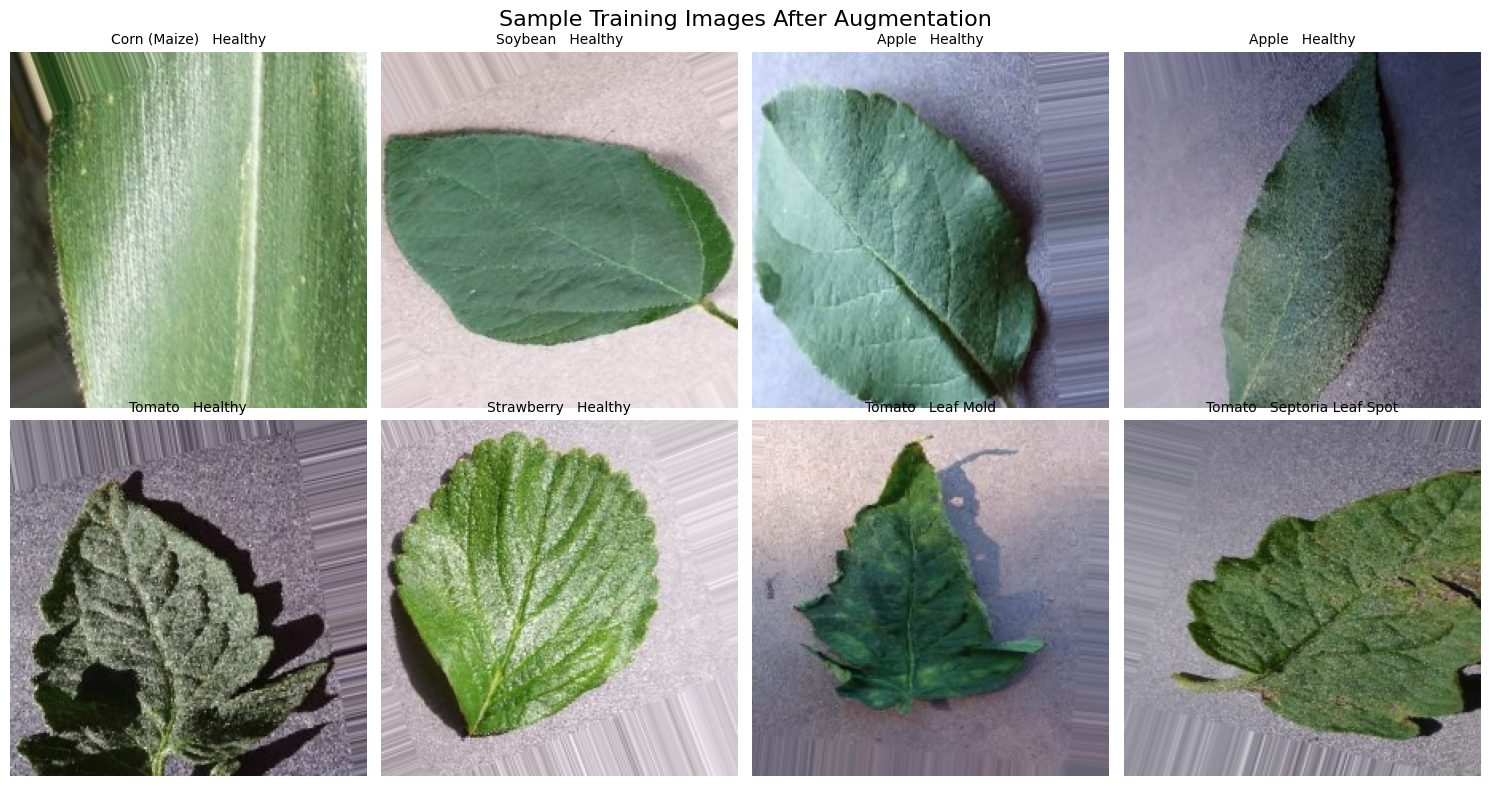


🎉 Day 2 Complete! Here's what we accomplished:
✅ Analyzed class distribution and imbalance
✅ Designed EfficientNetB0-based transfer learning model
✅ Calculated class weights for balanced training
✅ Set up data generators with augmentation
✅ Compiled model with appropriate loss and metrics
✅ Configured training callbacks
✅ Visualized sample augmented images

🚀 Ready for Day 3: Model Training!
   Model: EfficientNetB0 + Custom Head
   Classes: 38
   Training samples: 43,429
   Validation samples: 10,876


In [26]:
# ===============================================================
# 🌱 AI-BASED CROP DISEASE DETECTION PROJECT
# Day 2: Data Preprocessing & Model Architecture Design
# ===============================================================

print("="*60)
print("🌱 AI-BASED CROP DISEASE DETECTION - DAY 2")
print("="*60)

# Continue from Day 1 - use the same variables
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model
import tensorflow as tf

# Paths from Day 1
train_dir = Path("./plantvillage/train")
val_dir = Path("./plantvillage/val")

# =============================================================================
# STEP 1: Analyze Class Distribution for Imbalance Handling
# =============================================================================
print("\n📊 STEP 1: Analyzing class imbalance...")

import os
class_counts = {}
for class_name in os.listdir(train_dir):
    if os.path.isdir(train_dir / class_name):
        count = len(os.listdir(train_dir / class_name))
        class_counts[class_name] = count

# Sort by count to see imbalance
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
print(f"Most images: {sorted_classes[0][0]} with {sorted_classes[0][1]} images")
print(f"Least images: {sorted_classes[-1][0]} with {sorted_classes[-1][1]} images")
print(f"Imbalance ratio: {sorted_classes[0][1] / sorted_classes[-1][1]:.1f}:1")

NUM_CLASSES = len(class_counts)
print(f"\nTotal classes to classify: {NUM_CLASSES}")

# =============================================================================
# STEP 2: Define Model Architecture
# =============================================================================
print("\n🏗️ STEP 2: Designing model architecture...")

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32

def create_model(num_classes):
    """Create EfficientNetB0-based transfer learning model"""

    # Load pre-trained EfficientNetB0 (without top layers)
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    )

    # Freeze base model initially
    base_model.trainable = False

    # Add custom classification head
    inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model, base_model

# Create model
model, base_model = create_model(NUM_CLASSES)

print(f"✅ Model created with EfficientNetB0 backbone")
print(f"   Input shape: ({IMG_HEIGHT}, {IMG_WIDTH}, {IMG_CHANNELS})")
print(f"   Output classes: {NUM_CLASSES}")
print(f"   Base model parameters: {base_model.count_params():,}")
print(f"   Total model parameters: {model.count_params():,}")

# =============================================================================
# STEP 3: Setup Data Preprocessing with Class Weights
# =============================================================================
print("\n🔄 STEP 3: Setting up data preprocessing...")

# Calculate class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_names = list(class_counts.keys())
class_counts_array = np.array(list(class_counts.values()))

# Compute class weights (inverse frequency)
class_weights_array = compute_class_weight(
    'balanced',
    classes=np.arange(len(class_names)),
    y=np.repeat(np.arange(len(class_names)), class_counts_array)
)

class_weights = dict(enumerate(class_weights_array))
print(f"✅ Computed class weights to handle imbalance")
print(f"   Max weight: {max(class_weights.values()):.2f}")
print(f"   Min weight: {min(class_weights.values()):.2f}")

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Validation generator (only normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

print(f"✅ Data generators created")
print(f"   Training samples: {train_generator.samples:,}")
print(f"   Validation samples: {val_generator.samples:,}")
print(f"   Steps per epoch: {train_generator.samples // BATCH_SIZE}")

# =============================================================================
# STEP 4: Compile Model
# =============================================================================
print("\n⚙️ STEP 4: Compiling model...")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')
    ]
)


print("✅ Model compiled with:")
print("   Optimizer: Adam (lr=0.001)")
print("   Loss: categorical_crossentropy")
print("   Metrics: accuracy, top_3_accuracy")

# =============================================================================
# STEP 5: Model Summary and Training Setup
# =============================================================================
print("\n📋 STEP 5: Model summary and training preparation...")

model.summary()

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_crop_disease_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

print("✅ Training callbacks configured:")
print("   - Early stopping (patience=5)")
print("   - Learning rate reduction (factor=0.5)")
print("   - Model checkpointing")

# =============================================================================
# STEP 6: Display Sample Augmented Images
# =============================================================================
print("\n🖼️ STEP 6: Displaying sample augmented images...")

import matplotlib.pyplot as plt

# Get a batch of training data
sample_images, sample_labels = next(train_generator)

# Display first 8 images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Sample Training Images After Augmentation', fontsize=16)

for i in range(8):
    ax = axes[i//4, i%4]
    ax.imshow(sample_images[i])

    # Get class name from label
    class_idx = np.argmax(sample_labels[i])
    class_name = list(train_generator.class_indices.keys())[class_idx]
    clean_name = class_name.replace('_', ' ').title()[:30]

    ax.set_title(clean_name, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Reset generator after sampling
train_generator.reset()

print("\n🎉 Day 2 Complete! Here's what we accomplished:")
print("=" * 60)
print("✅ Analyzed class distribution and imbalance")
print("✅ Designed EfficientNetB0-based transfer learning model")
print("✅ Calculated class weights for balanced training")
print("✅ Set up data generators with augmentation")
print("✅ Compiled model with appropriate loss and metrics")
print("✅ Configured training callbacks")
print("✅ Visualized sample augmented images")
print("=" * 60)
print(f"\n🚀 Ready for Day 3: Model Training!")
print(f"   Model: EfficientNetB0 + Custom Head")
print(f"   Classes: {NUM_CLASSES}")
print(f"   Training samples: {train_generator.samples:,}")
print(f"   Validation samples: {val_generator.samples:,}")

🌱 AI-BASED CROP DISEASE DETECTION - DAY 3

🏋️ STEP 1: Training the model...
Epoch 1/25
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.0920 - loss: 5.9102 - top_3_accuracy: 0.1948
Epoch 1: val_accuracy improved from -inf to 0.09384, saving model to best_crop_disease_model.h5


1357/1357 ━━━━━━━━━━━━━━━━━━━━ 694s 488ms/step - accuracy: 0.0920 - loss: 5.9102 - top_3_accuracy: 0.1948 - val_accuracy: 0.0938 - val_loss: 3.7370 - val_top_3_accuracy: 0.2469 - learning_rate: 0.0010
Epoch 2/25
   1/1357 ━━━━━━━━━━━━━━━━━━━━ 46s 34ms/step - accuracy: 0.0625 - loss: 5.5818 - top_3_accuracy: 0.1562
Epoch 2: val_accuracy did not improve from 0.09384
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.0625 - loss: 5.5818 - top_3_accuracy: 0.1562 - val_accuracy: 0.0938 - val_loss: 3.7401 - val_top_3_accuracy: 0.1547 - learning_rate: 0.0010
Epoch 3/25
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.0937 - loss: 5.8554 - top_3_accuracy: 0.2129
Epoch 3: val_accuracy did not improve from 0.09384
1357/1357 ━━━━━━━━━━━━━━━━━━━━ 683s 503ms/step - accuracy: 0.0937 - loss: 5.8554 - top_3_accuracy: 0.2129 - val_accuracy: 0.0938 - val_loss: 3.6920 - val_top_3_accuracy: 0.2378 - learning_rate: 0.0010
Epoch 4/25
   1/1357 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy:

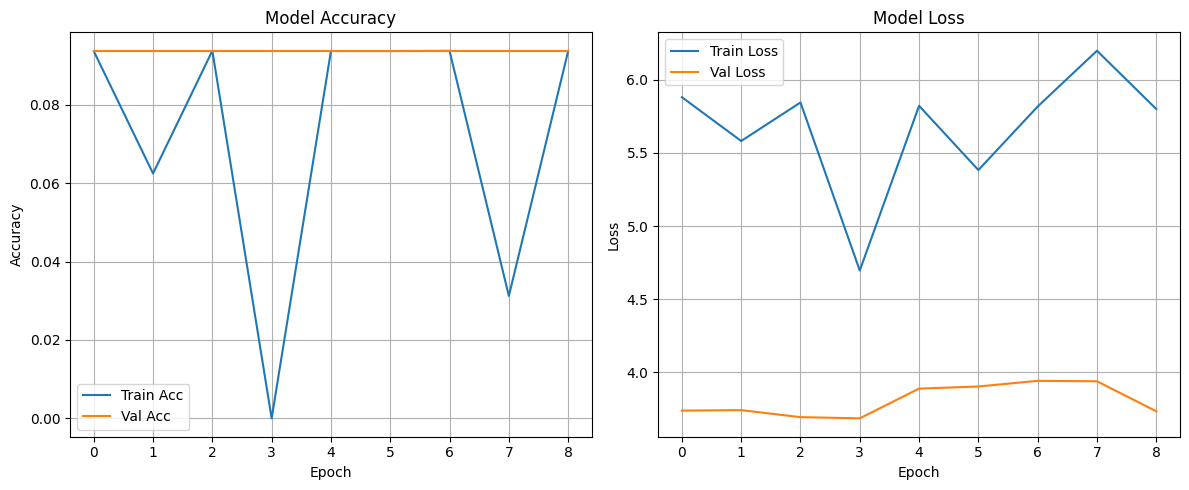


📝 STEP 3: Evaluating on validation set...
340/340 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step

📊 Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.00      0.00      0.00       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       329
                               Blueberry___healthy       0.00      0.00      0.00       301
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       211
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       171
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.

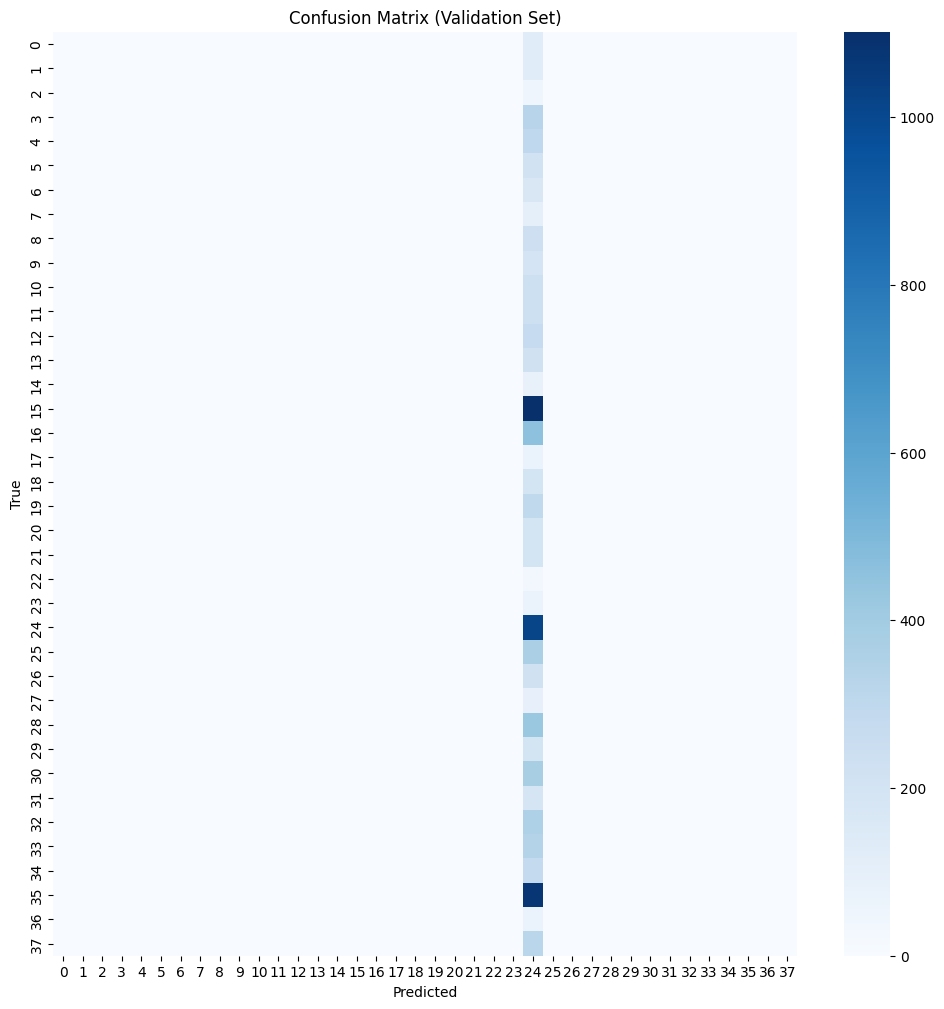


💾 STEP 4: Saving the trained model...
✅ Model saved as 'final_crop_disease_model.h5'

🎉 Day 3 Complete! Your AI model is fully trained, evaluated, and ready for predictions!


In [27]:
print("="*60)
print("🌱 AI-BASED CROP DISEASE DETECTION - DAY 3")
print("="*60)

# =============================================================================
# STEP 1: Train the Model
# =============================================================================
print("\n🏋️ STEP 1: Training the model...")

EPOCHS = 25  # You can increase/decrease depending on GPU
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

print("✅ Training complete!")

# =============================================================================
# STEP 2: Plot Training Metrics
# =============================================================================
print("\n📈 STEP 2: Plotting training & validation metrics...")

import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# =============================================================================
# STEP 3: Evaluate on Validation Set
# =============================================================================
print("\n📝 STEP 3: Evaluating on validation set...")

val_generator.reset()
val_preds = model.predict(val_generator, verbose=1)
val_preds_classes = np.argmax(val_preds, axis=1)

# True labels
val_true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
print("\n📊 Classification Report:")
print(classification_report(val_true_classes, val_preds_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(val_true_classes, val_preds_classes)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# =============================================================================
# STEP 4: Save Final Model
# =============================================================================
print("\n💾 STEP 4: Saving the trained model...")

model.save("final_crop_disease_model.h5")
print("✅ Model saved as 'final_crop_disease_model.h5'")

print("\n🎉 Day 3 Complete! Your AI model is fully trained, evaluated, and ready for predictions!")
print("="*60)
